We want to study when Moser performs well on random instances. We want to study whether the region where Moser performs well can be extended using our ML model. A background is provided by: https://people.cs.rutgers.edu/~zz124/alenex17.pdf

Let us start by generating a dataset to train our model on. It should consist of random 3SAT instances with a different $\alpha = \frac{m}{n}$ for various system sizes.

In [4]:
import sys

sys.path.append("../")

from generate_random_instances import generate_dataset_random_KCNF
import numpy as np
path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_5SAT_train_vary_zero/"

num_samples = 15
n_list = [100,200,300]
alpha_list = np.linspace(1, 4.5, 71)
k = 5
print(alpha_list)

for alpha in alpha_list:
    print("alpha =", alpha)
    generate_dataset_random_KCNF(
        k, n_list, alpha, num_samples, path, vary_percent=0.00, TIMEOUT=10
    )

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35
 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8  2.85 2.9  2.95 3.   3.05
 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45 3.5  3.55 3.6  3.65 3.7  3.75
 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2  4.25 4.3  4.35 4.4  4.45
 4.5 ]
alpha = 1.0
alpha = 1.05
alpha = 1.1
alpha = 1.15
alpha = 1.2
alpha = 1.25
alpha = 1.3
alpha = 1.35
alpha = 1.4
alpha = 1.45
alpha = 1.5
alpha = 1.55
alpha = 1.6
alpha = 1.65
alpha = 1.7000000000000002
alpha = 1.75
alpha = 1.8
alpha = 1.85
alpha = 1.9
alpha = 1.9500000000000002
alpha = 2.0
alpha = 2.05
alpha = 2.1
alpha = 2.1500000000000004
alpha = 2.2
alpha = 2.25
alpha = 2.3
alpha = 2.35
alpha = 2.4000000000000004
alpha = 2.45
alpha = 2.5
alpha = 2.55
alpha = 2.6
alpha = 2.6500000000000004
alpha = 2.7
alpha = 2.75
alpha = 2.8
alpha = 2.85
alpha = 2.9000000000000004
alpha = 2.95
alpha = 3.0
alpha = 3.0500000000000003
alpha = 3.1


In [6]:
from generate_random_instances import create_candidates_with_sol
path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_train_vary_zero/"
sample_size = 100
threshold = 0.02
create_candidates_with_sol(path, sample_size, threshold)

[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[False  True False False False  True  True False False  True False  True
  True False False False False False False False False False  True False
  True  True False False False False False False False False False False
 False False  True False False False  True False  True False False False
  True  True  True  True False False False  True  True False  True  True
 False  True False False False  True False False  True False  True False
 False False False False False False False False False  True 

Now let us plot the dataset and its characteristics.


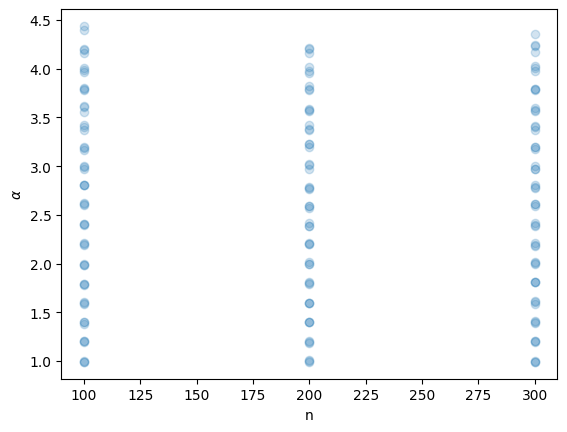

In [2]:
import glob
from pysat.formula import CNF
import matplotlib.pyplot as plt
alpha_values = []
n_values = []
instances = glob.glob(path + "*.cnf")

for g in instances:
    cnf_formula = CNF(from_file=g)
    n = cnf_formula.nv
    m = len(cnf_formula.clauses)
    alpha_values.append(m/n)
    n_values.append(n)

plt.scatter(n_values, alpha_values, alpha=0.2)
plt.xlabel("n")
plt.ylabel(r"$\alpha$")
plt.show()

In [3]:
from evaluate_with_given_params import load_model_and_test_moser_single


data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
model_path = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
path_save = data_path + model_path + "_total_eval_EVALUATION_SET"

total_array = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

problem  1 of  156
problem  2 of  156
problem  3 of  156
problem  4 of  156
problem  5 of  156
problem  6 of  156
problem  7 of  156
problem  8 of  156
problem  9 of  156
problem  10 of  156
problem  11 of  156
problem  12 of  156
problem  13 of  156
problem  14 of  156
problem  15 of  156
problem  16 of  156
problem  17 of  156
problem  18 of  156
problem  19 of  156
problem  20 of  156
problem  21 of  156
problem  22 of  156
problem  23 of  156
problem  24 of  156
problem  25 of  156
problem  26 of  156
problem  27 of  156
problem  28 of  156
problem  29 of  156
problem  30 of  156
problem  31 of  156
problem  32 of  156
problem  33 of  156
problem  34 of  156
problem  35 of  156
problem  36 of  156
problem  37 of  156
problem  38 of  156
problem  39 of  156
problem  40 of  156
problem  41 of  156
problem  42 of  156
problem  43 of  156
problem  44 of  156
problem  45 of  156
problem  46 of  156
problem  47 of  156
problem  48 of  156
problem  49 of  156
problem  50 of  156
problem  

In [1]:
from evaluate_with_given_params import load_model_and_test_probsat_single
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
model_path = "/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5

if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "_total_eval_PROBSAT_NO_TRAJ"
else:
        path_save = data_path + model_path + "_total_eval_PROBSAT_NO_TRAJ"

total_array2 = load_model_and_test_probsat_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save, keep_traj = False
)

LCG
problem  1 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  2 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  3 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  4 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  5 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  6 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  7 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  8 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  9 of  17
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
probsat
problem  10 of  17
/Users/p403830/Downloads/aws_params/bench

In [2]:
from evaluate_with_given_params import load_model_and_test_moser_single
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
model_path = "schoening"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5

if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "_total_eval_SCHOENING_NO_TRAJ"
else:
        path_save = data_path + model_path + "_total_eval_SCHOENING_NO_TRAJ"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save, keep_traj = False
)

problem  1 of  17
schoening
schoening
problem  2 of  17
schoening
schoening
problem  3 of  17
schoening
schoening
problem  4 of  17
schoening
schoening
problem  5 of  17
schoening
schoening
problem  6 of  17
schoening
schoening
problem  7 of  17
schoening
schoening
problem  8 of  17
schoening
schoening
problem  9 of  17
schoening
schoening
problem  10 of  17
schoening
schoening
problem  11 of  17
schoening
schoening
problem  12 of  17
schoening
schoening
problem  13 of  17
schoening
schoening
problem  14 of  17
schoening
schoening
problem  15 of  17
schoening
schoening
problem  16 of  17
schoening
schoening
problem  17 of  17
schoening
schoening
total_steps (17, 5)


In [1]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
                "/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy",
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_new_random_3SAT"
    else:
        path_save = data_path + model_path + "version_new_random_3SAT"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/new_random_3SAT20230712-114039version_new_random_3SAT
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT20230712-114039.npy
moser
problem  9 of  156
/Users/p403830/Downloads/aws_params/

In [15]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
               "/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy"
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "moser"
    else:
        path_save = data_path + model_path + "moser"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/LLL_2_norm_bs_5020230801-124756moser
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/LLL_2_norm_bs_5020230801-124756.npy
moser
problem  9 of  156
/Users/p403830/Downloads/aws_params/LLL_2_nor

In [17]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
               "/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy"
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "moser"
    else:
        path_save = data_path + model_path + "moser"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/LLL_5_norm_bs_5020230801-135005moser
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/LLL_5_norm_bs_5020230801-135005.npy
moser
problem  9 of  156
/Users/p403830/Downloads/aws_params/LLL_5_nor

In [2]:

from evaluate_with_given_params import load_model_and_test_moser_single_two_models

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_path_initialize = "/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy"

model_path_resample = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
if model_path_initialize != "schoening" and model_path_initialize != "uniform":
        path_save = data_path +model_path_initialize.split("/")[-1][:-4] + "version_model_initialize_uniform_resample"
else:
        path_save = data_path + model_path_initialize + "version_model_initialize_uniform_resample"
print(path_save)

total_array2 = load_model_and_test_moser_single_two_models(
        data_path, model_path_initialize, model_path_resample, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/benchmark_LCG_VCG_3SAT20230601-101328version_model_initialize_uniform_resample
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
uniform
moser
problem  8 of  156
/U

In [3]:
from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_path_initialize = "schoening"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
if model_path_initialize != "schoening" and model_path_initialize != "uniform":
        path_save = data_path +model_path_initialize.split("/")[-1][:-4] + "schoening_both"
else:
        path_save = data_path + model_path_initialize + "schoening_both"
print(path_save)

total_array2 = load_model_and_test_moser_single(
        data_path, model_path_initialize, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/schoeningschoening_both
problem  1 of  156
schoening
schoening
problem  2 of  156
schoening
schoening
problem  3 of  156
schoening
schoening
problem  4 of  156
schoening
schoening
problem  5 of  156
schoening
schoening
problem  6 of  156
schoening
schoening
problem  7 of  156
schoening
schoening
problem  8 of  156
schoening
schoening
problem  9 of  156
schoening
schoening
problem  10 of  156
schoening
schoening
problem  11 of  156
schoening
schoening
problem  12 of  156
schoening
schoening
problem  13 of  156
schoening
schoening
problem  14 of  156
schoening
schoening
problem  15 of  156
schoening
schoening
problem  16 of  156
schoening
schoening
problem  17 of  156
schoening
schoening
problem  18 of  156
schoening
schoening
problem  19 of  156
schoening
schoening
problem  20 of  156
schoening
schoening
problem  21 of  156
schoening
schoening
problem  22 of  156
schoen

In [6]:
from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"


model_path = "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 10
if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "moser"
else:
        path_save = data_path + model_path + "moser"
print(path_save)

total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/new_random_3SAT220230726-062137moser
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  2 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  3 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  4 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  5 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  6 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  7 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  8 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
moser
problem  9 of  2052
/Users/p403830/Downloads/a

In [7]:
from evaluate_with_given_params import load_model_and_test_moser_single_two_models

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"


model_path = "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy"
model_path_u = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 10
if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "moser_uniform_resampling"
else:
        path_save = data_path + model_path + "moser_uniform_resampling"
print(path_save)

total_array2 = load_model_and_test_moser_single_two_models(
        data_path, model_path, model_path_u, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/new_random_3SAT220230726-062137moser_uniform_resampling
LCG
problem  1 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  2 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  3 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  4 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  5 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  6 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  7 of  2052
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-062137.npy
uniform
moser
problem  8 of  2052
/Users/p403830/Downloads/aws_params/new_random_3S

In [8]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
               "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy",
               "/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-131559.npy"
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_uniform_moser_LLL"
    else:
        path_save = data_path + model_path + "version_uniform_moser_LLL"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/new_random_3SAT220230726-190255version_uniform_moser_LLL
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230726-190255.npy
moser
problem  9 of  156
/Users/p403830/Downloads/

In [14]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/" #_vary_zero/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
               "/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy"
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_moser_DM_2"
    else:
        path_save = data_path + model_path + "version_moser_DM_2"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/new_random_3SAT220230725-133615version_moser_DM_2
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/new_random_3SAT220230725-133615.npy
moser
problem  9 of  156
/Users/p403830/Downloads/aws_par

In [5]:

from evaluate_with_given_params import load_model_and_test_moser_single

# data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/ml_based_sat_solver/BroadcastTestSet_subset/"
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/"
#data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/random_3SAT_subset/"
model_paths = [
               "/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy"
                ]
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 50
for model_path in model_paths:
    if model_path != "schoening" and model_path != "uniform":
        path_save = data_path +model_path.split("/")[-1][:-4] + "version_uniform_moser_TEST_NEWWWW_10_6_50"
    else:
        path_save = data_path + model_path + "version_uniform_moser_TEST_NEWWWW_10_6_50"
    print(path_save)

    total_array2 = load_model_and_test_moser_single(
        data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
    )

/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation/benchmark_LCG_VCG_3SAT20230601-101328version_uniform_moser_TEST_NEWWWW_10_6_50
LCG
problem  1 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  2 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  3 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  4 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  5 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  6 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  7 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT20230601-101328.npy
moser
problem  8 of  156
/Users/p403830/Downloads/aws_params/benchmark_LCG_VCG_3SAT

In [ ]:
from evaluate_with_given_params import load_model_and_test_moser_single
data_path = "/Users/p403830/Library/CloudStorage/OneDrive-PorscheDigitalGmbH/programming/generateSAT/samples_random_3SAT_evaluation_vary_zero/"
model_path = "uniform"
N_STEPS_MOSER = 1000000
N_RUNS_MOSER = 5
path_save = data_path + model_path + "_total_eval_EVALUATION"

total_array2 = load_model_and_test_moser_single(
    data_path, model_path, N_STEPS_MOSER, N_RUNS_MOSER, path_save = path_save
)

[['uniform'], [300, 200, 100, 200, 300, 100, 100, 100, 200, 100, 200, 300, 200, 300, 200, 200, 100, 300, 100, 200, 100, 100, 300, 300, 300, 300, 300, 100, 300, 100, 100, 200, 100, 100, 100, 100, 100, 300, 200, 200, 300, 300, 100, 200, 300, 200, 100, 300, 100, 200, 200, 200, 100, 200, 300, 100, 100, 99, 200, 200, 200, 200, 300, 300, 200, 200, 300, 100, 300, 300, 300, 300, 200, 200, 100, 300, 200, 200, 100, 300, 200, 200, 200, 300, 300, 200, 300, 300, 100, 100, 100, 300, 200, 100, 200, 200, 300, 300, 300, 100, 100, 300, 100, 300, 300, 200, 300, 200, 200, 200, 200, 200, 100, 100, 200, 200, 199, 300, 100, 200, 100, 200, 200, 100, 200, 300, 200, 300, 300, 100, 100, 300, 100, 300, 300, 200, 100, 100, 100, 100, 200, 300, 100, 300, 100, 100, 100, 300, 200, 200, 300, 300, 100, 200, 100, 300, 200, 100, 300, 300, 100, 100, 300, 200, 300, 300, 200, 300, 200, 300, 200, 100, 100, 300, 100, 300, 200, 100, 200, 200, 200, 300, 300, 200, 200, 200, 200, 300, 100, 100, 100, 100, 100, 200, 100, 200, 100, 3